In [1]:
import pandas as pd
from shapely.wkt import loads
from shapely.geometry import LineString
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import math




points = pd.read_pickle("Data/points.pkl")
trajs = pd.read_pickle("Data/trajectories.pkl")

points = points.sort_values(by=["trajectory_sid", "timestamp"])
grouped_points = points.groupby("trajectory_sid")["timestamp"].apply(list).reset_index()

heading_df = pd.merge(trajs, grouped_points, left_index=True, right_on="trajectory_sid", how="left")

road_80_points = [LineString([(317457, 6393404), (317675, 6393394)]), LineString([(316999, 6390947), (317122, 6390534)]), LineString([(316677, 6399129), (316534, 6399076)]), LineString([(322608, 6392581), (322467, 6392879)]), LineString([(330496, 6403701), (330326, 6403656)])]
road_80_names = ["järnbrottet", "askim", "oscarleden", "åbymotet", "jonsered"]


In [ ]:
print(len(heading_df))
heading_df = heading_df.loc[heading_df.speed < 120]
print(len(heading_df))

In [2]:
# Vägen utanför Sörred har bra dippar 
import pandas as pd


tv_jarnbrottet = {"location": ["järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", "järnbrottet", ],
           "hour": ["2018-12-18 23:00", "2018-12-18 00:00", "2018-12-18 01:00", "2018-12-18 02:00", "2018-12-18 03:00", "2018-12-18 04:00", "2018-12-18 05:00", "2018-12-18 06:00", "2018-12-18 07:00", "2018-12-18 08:00", "2018-12-18 09:00", "2018-12-18 10:00", "2018-12-18 11:00", "2018-12-18 12:00", "2018-12-18 13:00", "2018-12-18 14:00", "2018-12-18 15:00", "2018-12-18 16:00", "2018-12-18 17:00", "2018-12-18 18:00", "2018-12-18 19:00", "2018-12-18 20:00", "2018-12-18 21:00", "2018-12-18 22:00", ],
           "mean_speed": [86.7, 85.6, 88.2, 88.9, 83.4, 85, 86.1, 82.9, 74.2, 76, 80.6, 79.1, 79.1, 77.7, 78.4, 77.9, 75.7, 74.6, 76.1, 79.5, 81.7, 82.6, 83.6, 82.9],
           "num_cars": [176, 212, 93, 55, 73, 135, 591, 2058, 3351, 2977, 1988, 2164, 2333, 2484, 2394, 2687, 3235, 3084, 2563, 1866, 1356, 945, 652, 345]}

#
tv_askim = {"location": ["askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", "askim", ],
           "hour": ["2017-08-23 12:00", "2017-08-23 13:00", "2017-08-23 14:00", "2017-08-23 15:00", "2017-08-23 16:00", "2017-08-23 17:00", "2017-08-23 18:00", "2017-08-23 19:00", "2017-08-23 20:00", "2017-08-23 21:00", "2017-08-23 22:00", "2017-08-23 23:00", "2017-08-23 00:00", "2017-08-23 01:00", "2017-08-23 02:00", "2017-08-23 03:00", "2017-08-23 04:00", "2017-08-23 05:00", "2017-08-23 06:00", "2017-08-23 07:00", "2017-08-23 08:00", "2017-08-23 09:00", "2017-08-23 10:00", "2017-08-23 11:00", ],
           "mean_speed": [77.3, 76.4, 74, 75.8, 76.7, 75.2, 76.1, 75.8, 75.3, 77, 79.2, 82, 80.2, 85.8, 82.4, 88.2, 91.2, 86.7, 82.4, 69.4, 66.9, 75.1, 75.6, 74.3],
           "num_cars": [818, 850, 989, 1114, 1142, 999, 824, 720, 713, 461, 208, 73, 40, 26, 18, 9, 42, 288, 1230, 2510, 2879, 958, 838, 891]}

tv_oscarleden = {"location": ["oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", "oscarleden", ],
           "hour": ["2019-12-05 12:00", "2019-12-05 13:00", "2019-12-05 14:00", "2019-12-05 15:00", "2019-12-05 16:00", "2019-12-05 17:00", "2019-12-05 18:00", "2019-12-05 19:00", "2019-12-05 20:00", "2019-12-05 21:00", "2019-12-05 22:00", "2019-12-05 23:00", "2019-12-05 00:00", "2019-12-05 01:00", "2019-12-05 02:00", "2019-12-05 03:00", "2019-12-05 04:00", "2019-12-05 05:00", "2019-12-05 06:00", "2019-12-05 07:00", "2019-12-05 08:00", "2019-12-05 09:00", "2019-12-05 10:00", "2019-12-05 11:00", ],
           "mean_speed": [76.7, 75.4, 75.7, 73.6, 73, 72.6, 76, 77.5, 77.5, 77.5, 78.2, 81.5, 78.9, 81.6, 79.8, 77.8, 82.2, 80.3, 80.6, 74.7, 75, 74.2, 76.6, 75.6],
           "num_cars": [1244, 1411, 1622, 2310, 2082, 1925, 1246, 803, 673, 589, 441, 254, 235, 111, 82, 52, 99, 387, 1134, 2019, 1930, 1300, 1236, 1455]}

tv_abymotet = {"location": ["åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", "åbymotet", ],
               "hour": ["2019-10-10 12:00", "2019-10-10 13:00", "2019-10-10 14:00", "2019-10-10 15:00", "2019-10-10 16:00", "2019-10-10 17:00", "2019-10-10 18:00", "2019-10-10 19:00", "2019-10-10 20:00", "2019-10-10 21:00", "2019-10-10 22:00", "2019-10-10 23:00", "2019-10-10 00:00", "2019-10-10 01:00", "2019-10-10 02:00", "2019-10-10 03:00", "2019-10-10 04:00", "2019-10-10 05:00", "2019-10-10 06:00", "2019-10-10 07:00", "2019-10-10 08:00", "2019-10-10 09:00", "2019-10-10 10:00", "2019-10-10 11:00"],
               "mean_speed": [74.7, 74.4, 75.1, 76.3, 76.9, 76.2, 75.5, 73.1, 73.8, 74.6, 75.1, 78.4, 75.4, 73.6, 69.6, 73.6, 77.4, 77.5, 72.6, 71.1, 74.2, 75.2, 74.8, 74.8],
               "num_cars": [784, 828, 936, 981, 1127, 930, 758, 551, 382, 239, 153, 122, 59, 33, 15, 34, 76, 518, 1749, 2147, 1471, 833, 820, 857]}

tv_jonsered = {"location": ["jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered", "jonsered"],
               "hour": ["2018-07-04 22:00", "2018-07-04 23:00", "2018-07-04 00:00", "2018-07-04 01:00", "2018-07-04 02:00", "2018-07-04 03:00", "2018-07-04 04:00", "2018-07-04 05:00", "2018-07-04 06:00", "2018-07-04 07:00", "2018-07-04 08:00", "2018-07-04 09:00", "2018-07-04 10:00", "2018-07-04 11:00", "2018-07-04 12:00", "2018-07-04 13:00", "2018-07-04 14:00", "2018-07-04 15:00", "2018-07-04 16:00", "2018-07-04 17:00", "2018-07-04 18:00", "2018-07-04 19:00", "2018-07-04 20:00", "2018-07-04 21:00", ],
               "mean_speed": [95.2, 95.5, 96.1, 92.6, 94, 93.3, 97.2, 100.7, 99.7, 96.5, 96.3, 93.3, 91.0, 92.4, 92.8, 92.6, 93.4, 93.4, 93.4, 94, 94.6, 97.2, 95, 97.2],
               "num_cars": [378, 213, 100, 80, 66, 63, 111, 748, 2230, 2237, 1566, 1146, 1286, 1312, 1134, 1091, 1253, 1354, 1402, 1239, 1057, 710, 637, 542]}

df_jarnbrottet = pd.DataFrame(tv_jarnbrottet)
df_askim = pd.DataFrame(tv_askim)
df_oscarleden = pd.DataFrame(tv_oscarleden)
df_abymotet = pd.DataFrame(tv_abymotet)
df_jonsered = pd.DataFrame(tv_jonsered)

tv_df = pd.concat([df_jarnbrottet, df_askim, df_oscarleden, df_abymotet, df_jonsered], axis=0).reset_index(drop=True)

tv_df["hour"] = pd.to_datetime(tv_df["hour"])

In [3]:
location_car_counts = tv_df.groupby('location')['num_cars'].sum().reset_index(name='total_cars')
print(location_car_counts)

      location  total_cars
0        askim       18640
1     jonsered       21955
2  järnbrottet       37817
3   oscarleden       24640
4     åbymotet       16403


In [3]:
for road_section in range(len(road_80_points)):

    # Convert the road_section to a Shapely LineString object
    road_section_line = road_80_points[road_section]

    # Define the buffer distance (adjust as needed)
    buffer_distance = 20.0  # Adjust the buffer distance as needed (in the same units as your coordinates)

    # Create a buffered polygon around the road section
    buffered_road_section = road_80_points[road_section].buffer(buffer_distance)

    def count_cars_passing(trajectory, buffered_road_section):
        try:
            # Convert the trajectory to a Shapely LineString object
            trajectory_line = loads(trajectory)
            
            # Check if the trajectory intersects the buffered road section
            if trajectory_line.intersects(buffered_road_section):
                return 1  # This trajectory intersects the buffered road section
            else:
                return 0  # This trajectory does not intersect the buffered road section
        except:
            pass

    heading_df[road_80_names[road_section]] = heading_df['line'].apply(count_cars_passing, buffered_road_section=buffered_road_section)
    print(road_80_names[road_section])

In [4]:
heading_df = heading_df[(heading_df["järnbrottet"] == 1) | (heading_df["askim"] == 1) | (heading_df["oscarleden"] == 1) | (heading_df["åbymotet"] == 1) | (heading_df["jonsered"] == 1)].reset_index(drop=True)


heading_df['geometry'] = heading_df['line'].apply(wkt.loads)

# Convert DataFrame to GeoDataFrame
geodf = gpd.GeoDataFrame(heading_df, geometry='geometry')

def extract_coords_and_time(line, timestamps, point1, point2):
    coords = list(line.coords)

    distance_p1 = [Point(pt).distance(point1) for pt in coords]
    distance_p2 = [Point(pt).distance(point2) for pt in coords]
    # print(distance_p1)
    # print(distance_p2)

    closest_index_p1 = distance_p1.index(min(distance_p1))
    closest_index_p2 = distance_p2.index(min(distance_p2))
    # print(f"close index p1: {closest_index_p1}. Close index p2: {closest_index_p2}")
    # print(f"distance_p1: {min(distance_p1)}. Distance p2 {min(distance_p2)}")

    # Extract the segment between the closest points
    filtered_coords = coords[closest_index_p1:closest_index_p2 + 1]
    filtered_timestamps = timestamps[closest_index_p1:closest_index_p2 + 1]

    if len(filtered_coords) < 2:
        return None, None

    return LineString(filtered_coords), filtered_timestamps


### # kan vara fel med point1, point2 sista listan som matchar koordinaterna på dicten

distance_points = {"järnbrottet": [[Point(317457, 6393404), Point(317675, 6393394)], [(80, 100), (260, 280)]], "askim": [[Point(316999, 6390947), Point(317122, 6390534)], [(320, 340), (160, 180)]], "oscarleden": [[Point(316677, 6399129), Point(316534, 6399076)], [(230, 250), (50, 70)]],
                   "åbymotet": [[Point(322608, 6392581), Point(322467, 6392879)], [(320, 340), (140, 160)]], "jonsered": [[Point(330496, 6403701), Point(330326, 6403656)], [(60, 80), (240, 260)]]}

for road_name in road_80_names:
    POINT1, POINT2 = distance_points[road_name][0]
    
    mask = geodf[road_name] == 1
    
    def wrapper(row):
        return extract_coords_and_time(row['geometry'], row['timestamp'], POINT1, POINT2)
    
    filtered_data = geodf[mask].apply(wrapper, axis=1, result_type="expand")
    
    geodf.loc[mask, 'filtered_trajectory'] = filtered_data[0]
    geodf.loc[mask, 'filtered_timestamps'] = filtered_data[1]


In [5]:
filt_geo = geodf[geodf.filtered_trajectory.notna()].reset_index(drop=True)

import math

def calculate_heading(x1, y1, x2, y2):
    delta_x = x2 - x1
    delta_y = y2 - y1
    theta_rad = math.atan2(delta_x, delta_y)
    theta_deg = math.degrees(theta_rad)
    if theta_deg < 0:
        theta_deg += 360
    return theta_deg

def get_headings(linestring):
    coords = list(linestring.coords)
    # headings = 0
    for i in range(len(coords) - 1):
        x1, y1 = coords[i]
        x2, y2 = coords[i+1]
        heading = calculate_heading(x1, y1, x2, y2)
        # headings.append(heading)
    return heading

# Sample DataFrame with LineString column

filt_geo['headings'] = filt_geo['filtered_trajectory'].apply(get_headings)

In [6]:
# Starting with an empty mask (all False values)
mask = pd.Series([False] * len(filt_geo))

for road_name in road_80_names:  # Iterate over road names
    heading_thresholds = distance_points[road_name][1]
    road_mask = (filt_geo[road_name] == 1)  # Start with a mask for the current road

    # Construct heading-based conditions for the current road
    conditions = [
        ((filt_geo['headings'] >= threshold[0]) & (filt_geo['headings'] <= threshold[1]))
        for threshold in heading_thresholds
    ]

    # Combine conditions with OR (|)
    combined_conditions = conditions[0]
    for condition in conditions[1:]:
        combined_conditions |= condition

    # Combine road mask with heading-based conditions using AND (&)
    road_mask &= combined_conditions

    # Combine with overall mask using OR (|)
    mask |= road_mask

# Filter the dataframe using the mask
heading_df = filt_geo[mask]


In [7]:
heading_df['first_timestamp'] = heading_df['timestamp'].apply(lambda x: x[0] if isinstance(x, list) and x else None)
heading_df['first_timestamp'] = heading_df['first_timestamp'].astype(str)

heading_df['first_timestamp'] = heading_df['first_timestamp'].str.replace("+02:00", "").str.replace("+01:00", "")
heading_df.first_timestamp = pd.to_datetime(heading_df['first_timestamp'])

c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is tryin

In [8]:
cop = heading_df.copy()
cop['hourr'] = cop['first_timestamp'].dt.hour

# Compute mean speed for each hour without setting index
mean_speed_per_hour = cop.groupby('hourr')['speed'].mean().reset_index()
median_speed_per_hour = cop.groupby('hourr')['speed'].median().reset_index()


print(mean_speed_per_hour, median_speed_per_hour)

    hourr      speed
0       0  77.097293
1       1  81.277980
2       2  85.275511
3       3  82.976779
4       4  73.490120
5       5  70.944654
6       6  71.761007
7       7  76.166519
8       8  79.730928
9       9  78.900672
10     10  75.372905
11     11  76.553150
12     12  75.125001
13     13  74.539044
14     14  71.298089
15     15  68.629521
16     16  70.680278
17     17  77.126104
18     18  76.511546
19     19  78.523947
20     20  77.940457
21     21  82.629612
22     22  84.560772
23     23  81.581257     hourr      speed
0       0  78.428571
1       1  82.289746
2       2  88.051765
3       3  81.398184
4       4  75.553704
5       5  68.630664
6       6  71.100000
7       7  76.575369
8       8  79.907617
9       9  79.252737
10     10  76.202809
11     11  77.813535
12     12  74.920063
13     13  74.052606
14     14  71.489645
15     15  71.945904
16     16  72.981741
17     17  77.627586
18     18  76.366162
19     19  80.100000
20     20  77.466910
21     21  87

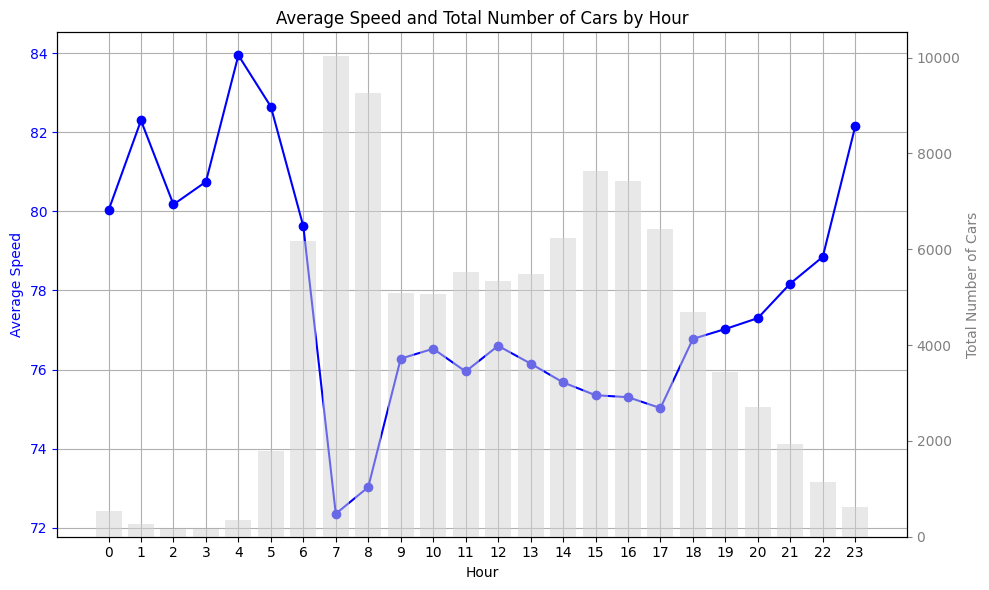

In [9]:
# tv_df['plot_hour'] = tv_df['hour'].dt.hour

tv_df['plot_hour'] = tv_df['hour'].dt.hour

tv_hourly_avg_speed = tv_df.groupby('plot_hour')['mean_speed'].mean().reset_index()
tv_hourly_total_cars = tv_df.groupby('plot_hour')['num_cars'].sum().reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Average Speed
ax1.plot(tv_hourly_avg_speed['plot_hour'], tv_hourly_avg_speed['mean_speed'], marker='o', linestyle='-', color='b', label='Average Speed')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Speed', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticks(tv_hourly_avg_speed['plot_hour'])

# Total Number of Cars
ax2 = ax1.twinx()
ax2.bar(tv_hourly_total_cars['plot_hour'], tv_hourly_total_cars['num_cars'], color='lightgray', alpha=0.5, label='Total Number of Cars')
ax2.set_ylabel('Total Number of Cars', color='gray')
ax2.tick_params('y', colors='gray')

# Title and grid
plt.title('Average Speed and Total Number of Cars by Hour')
ax1.grid(True)
fig.tight_layout()
plt.show()

c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


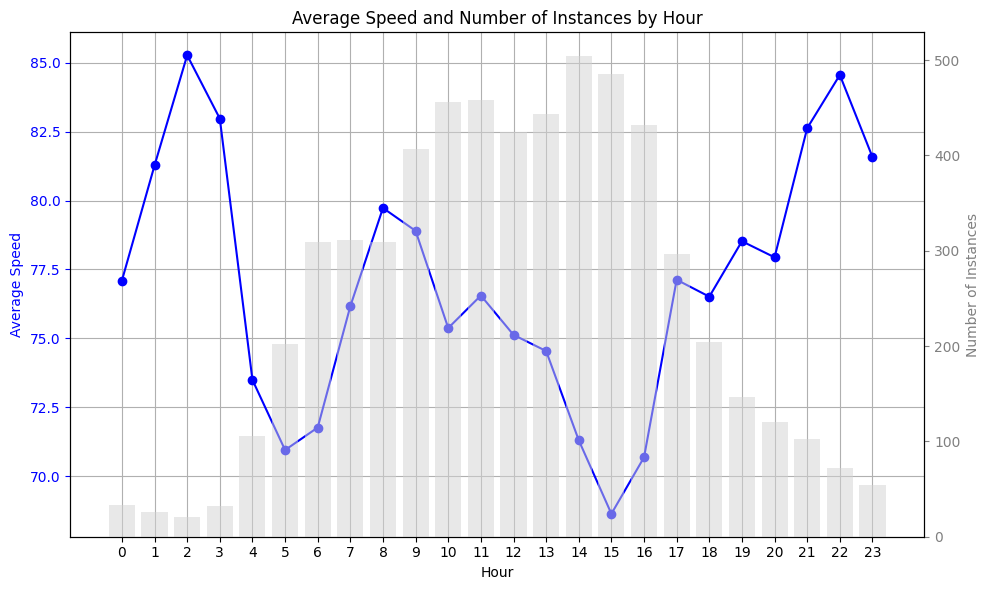

In [10]:

heading_df['hour'] = heading_df['first_timestamp'].dt.hour
hourly_avg_speed = heading_df.groupby('hour')['speed'].mean().reset_index()



hourly_counts = heading_df.groupby('hour').size().reset_index(name='count')


fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average speed on the left y-axis
ax1.plot(hourly_avg_speed['hour'], hourly_avg_speed['speed'], marker='o', linestyle='-', color='b', label='Average Speed')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Speed', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticks(hourly_avg_speed['hour'])

# Create a second y-axis to plot the number of instances
ax2 = ax1.twinx()
ax2.bar(hourly_counts['hour'], hourly_counts['count'], color='lightgray', alpha=0.5, label='Number of Instances')
ax2.set_ylabel('Number of Instances', color='gray')
ax2.tick_params('y', colors='gray')

# Set title, grid and show the plot
plt.title('Average Speed and Number of Instances by Hour')
ax1.grid(True)
fig.tight_layout()
plt.show()


c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is tryin

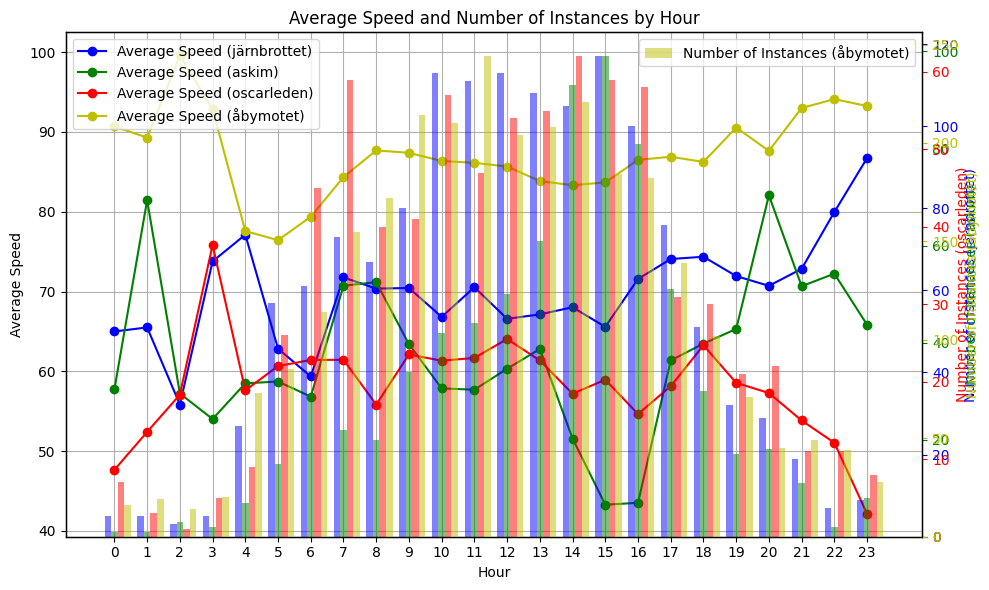

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 6))

colors = ['b', 'g', 'r', 'y']  # Different colors for each road
road_80_names = ["järnbrottet", "askim", "oscarleden", "åbymotet"]  # Your road names

for idx, road_name in enumerate(road_80_names):
    # Filter rows for the current road
    road_df = heading_df[heading_df[road_name] == 1]
    
    # Compute hourly average speed and counts
    road_df['hour'] = road_df['first_timestamp'].dt.hour
    hourly_avg_speed = road_df.groupby('hour')['speed'].mean().reset_index()
    hourly_counts = road_df.groupby('hour').size().reset_index(name='count')

    # Plot average speed for the current road on the left y-axis
    ax1.plot(hourly_avg_speed['hour'], hourly_avg_speed['speed'], marker='o', linestyle='-', color=colors[idx], label=f'Average Speed ({road_name})')
    
    # Plot number of instances for the current road on the right y-axis
    ax2 = ax1.twinx()
    ax2.bar(hourly_counts['hour'] + 0.2*(idx-1), hourly_counts['count'], color=colors[idx], alpha=0.5, label=f'Number of Instances ({road_name})', width=0.2)
    ax2.set_ylabel(f'Number of Instances ({road_name})', color=colors[idx])
    ax2.tick_params('y', colors=colors[idx])

ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Speed')
ax1.set_xticks(hourly_avg_speed['hour'])
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Average Speed and Number of Instances by Hour')
fig.tight_layout()
plt.show()



c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is tryin

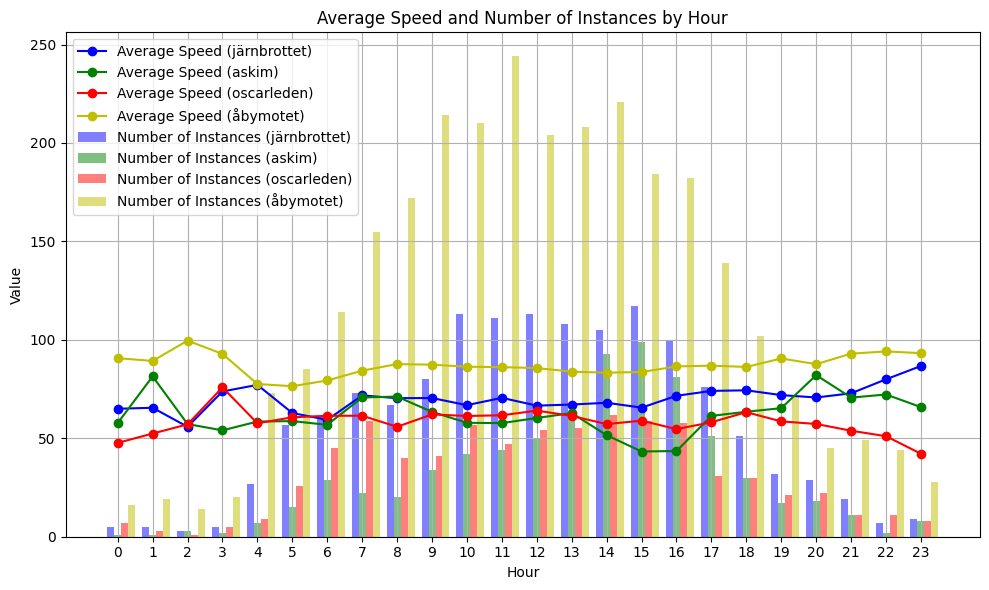

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 6))

colors = ['b', 'g', 'r', 'y']  # Different colors for each road
road_80_names = ["järnbrottet", "askim", "oscarleden", "åbymotet"]  # Your road names

for idx, road_name in enumerate(road_80_names):
    # Filter rows for the current road
    road_df = heading_df[heading_df[road_name] == 1]
    
    # Compute hourly average speed and counts
    road_df['hour'] = road_df['first_timestamp'].dt.hour
    hourly_avg_speed = road_df.groupby('hour')['speed'].mean().reset_index()
    hourly_counts = road_df.groupby('hour').size().reset_index(name='count')

    # Plot average speed for the current road on ax1
    ax1.plot(hourly_avg_speed['hour'], hourly_avg_speed['speed'], marker='o', linestyle='-', color=colors[idx], label=f'Average Speed ({road_name})')
    
    # Plot number of instances for the current road on ax1 as bars
    ax1.bar(hourly_counts['hour'] + 0.2*(idx-1), hourly_counts['count'], color=colors[idx], alpha=0.5, label=f'Number of Instances ({road_name})', width=0.2)

ax1.set_xlabel('Hour')
ax1.set_ylabel('Value')
ax1.set_xticks(hourly_avg_speed['hour'])
ax1.grid(True)
ax1.legend(loc='upper left')
plt.title('Average Speed and Number of Instances by Hour')
fig.tight_layout()
plt.show()


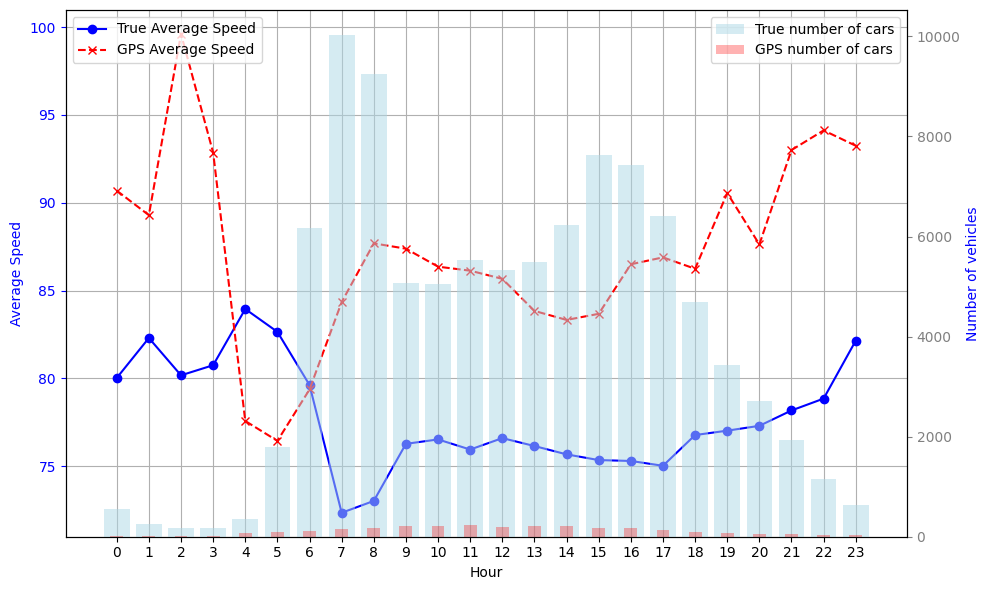

In [13]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- For tv_df data ---

# Average Speed for tv_df
ax1.plot(tv_hourly_avg_speed['plot_hour'], tv_hourly_avg_speed['mean_speed'], marker='o', linestyle='-', color='b', label='True Average Speed')
# Total Number of Cars
ax2 = ax1.twinx()
ax2.bar(tv_hourly_total_cars['plot_hour'], tv_hourly_total_cars['num_cars'], color='lightblue', alpha=0.5, label='True number of cars')

# --- For heading_df data ---

# Average Speed for heading_df
ax1.plot(hourly_avg_speed['hour'], hourly_avg_speed['speed'], marker='x', linestyle='--', color='r', label='GPS Average Speed')
# Number of Instances
ax2.bar(hourly_counts['hour'], hourly_counts['count'], color='red', alpha=0.3, label='GPS number of cars', width=0.4)

# Labels and other plot adjustments
ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Speed', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(loc='upper left')
ax1.set_xticks(tv_hourly_avg_speed['plot_hour'])
ax2.set_ylabel('Number of vehicles', color='blue')
ax2.tick_params('y', colors='gray')
ax2.legend(loc='upper right')

# plt.title('Combined Plot of Average Speed, Number of Cars, and Number of Instances by Hour')
ax1.grid(True)
fig.tight_layout()
plt.savefig("comb_freeflow.png")
plt.show()

In [14]:
heading_df.shape

(5958, 20)

In [15]:
tv_df.num_cars.sum()

97500